In [ ]:
from osgeo import gdal

In [ ]:
dem_path = "/content/drive/MyDrive/Image Segmentation/"
high_res_dem = dem_path + "high_dem_filled.tif"

In [ ]:
dem = gdal.Open(high_res_dem)
band = dem.GetRasterBand(1)
no_data_value = band.GetNoDataValue()

In [ ]:
gt = dem.GetGeoTransform()
gt

(-534126.5, 1.0, 0.0, 135856.5, 0.0, -1.0)

In [ ]:
xmin = gt[0]
ymax = gt[3]
res = gt[1]

In [ ]:
xlen = res * dem.RasterXSize

In [ ]:
xlen

6418.0

In [ ]:
ylen = res * dem.RasterYSize
ylen

11339.0

In [ ]:
xdiv = 3
ydiv = 5

In [ ]:
xsize = xlen/xdiv
ysize = ylen/ydiv

In [ ]:
print(xsize, ysize)

2139.3333333333335 2267.8


In [ ]:
xsteps = [xmin + xsize * i for i in range(xdiv+1)]
ysteps = [ymax - ysize * i for i in range(ydiv+1)]

In [ ]:
for i in range(xdiv):
  for j in range(ydiv):
    xmin = xsteps[i]
    xmax = xsteps[i+1]
    ymax = ysteps[j]
    ymin = ysteps[j+1]
    # print("xmin = "+str(xmin))
    # print("xmax = "+str(xmax))
    # print("ymin = "+str(ymin))
    # print("ymax = "+str(ymax))
    # print("\n")
    gdal.Warp(dem_path+"/tiles/dem"+str(i)+str(j)+".tif", dem,
          outputBounds=(xmin, ymin, xmax, ymax),
          dstNodata = no_data_value)
    # same result
    # gdal.Translate(dem_path+"/tiles/dem_tanslate"+str(i)+str(j)+".tif", dem,
    #                projWin = (xmin, ymax, xmax, ymin))


In [ ]:
pip install rasterio

     |████████████████████████████████| 19.3 MB 398 kB/s 


In [ ]:
import os,  re
from pathlib import Path
import rasterio
import rasterio.plot
import matplotlib.pyplot as plt

In [ ]:



def get_files(folder, ext="tif"):
    """get all files with a specified extension in a folder"""
    glob_path = Path(folder)
    return [file for file in glob_path.glob(f"*.{ext}")]

In [ ]:
# for file in get_files(dem_path + "tiles/"):
#   with rasterio.open(file) as tile:
#     rasterio.plot.show(tile)

In [ ]:
import ntpath
print(ntpath.basename("usr/temp/new/sample"))

sample


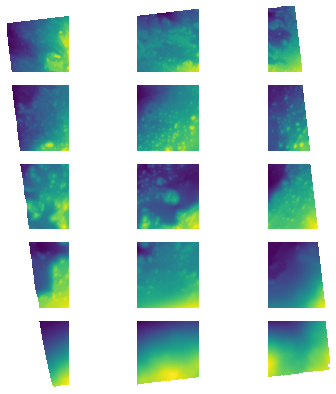

In [ ]:
fig, ax = plt.subplots(ydiv, xdiv, figsize=(7, 7))
plt.subplots_adjust(wspace =0.0001)
ax = ax.flatten('F')
# fig.tight_layout()
i=0
for file in get_files(dem_path + "tiles/"):
  with rasterio.open(file) as tile:
    ax[i].axis('off')
    rasterio.plot.show(tile, ax=ax[i])
    i+=1

In [ ]:
fig.savefig(dem_path+"Tiles.png")

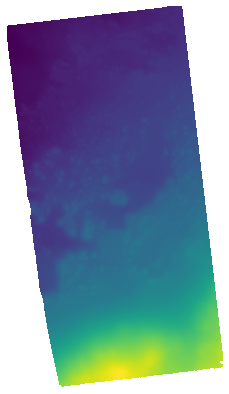

In [ ]:
  fig, ax = plt.subplots(1, 1, figsize=(7, 7))
  ax.axis("off")
  with rasterio.open(high_res_dem) as dem:
    rasterio.plot.show(dem)

In [ ]:
fig.savefig(dem_path+"Original_DEM.png")